In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

with tf.device('/device:GPU:0'):
    print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

data_dir = 'simple_images'

# Apply transformations to augment the dataset and convert it to a tensor
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(256, 256),
        layers.experimental.preprocessing.RandomCrop(224, 224),
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.Rescaling(1./255),
        layers.experimental.preprocessing.RandomContrast(0.1),
    ]
)

# Load the dataset
dataset = image_dataset_from_directory(
    data_dir,
    batch_size=16,
    image_size=(224, 224),
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode='categorical'
)

# Split the dataset into training and validation sets
val_dataset = image_dataset_from_directory(
    data_dir,
    batch_size=16,
    image_size=(224, 224),
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode='categorical'
)

# Create DataLoaders for training and validation
train_loader = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_loader = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Get the number of classes
num_classes = len(dataset.class_names)

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_loader,
                    validation_data=val_loader,
                    epochs=10)


In [ ]:
from pathlib import Path
import imghdr

data_dir = "simple_images"
image_extensions = [".png", ".jpg", ".jpeg"]  # add there all your images file extensions
remove_count = 0
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
            remove_count += 1
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)
            remove_count += 1


print (f"Removed {remove_count} files")

In [ ]:
import os
import cv2
def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                index=f.rfind('.')
                ext=f[index+1:].lower()
                if ext not in ext_list:
                    print('file ', f_path, ' has an invalid extension ', ext)
                    bad_ext.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir ='simple_images'
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
        print('deleting file ', bad_file_list[i])
        os.remove(bad_file_list[i])
else:
    print(' no improper image files were found')

In [4]:
# Delete images that are less than 10Ko
import os

data_dir = 'simple_images'

for root, dirs, files in os.walk(data_dir):
    for file in files:
        if os.path.getsize(os.path.join(root, file)) < 10000:
            print(f"Removing {file}...")
            os.remove(os.path.join(root, file))

Removing beaufort_47.jpeg...
Removing beaufort_100.jpeg...
Removing beaufort_14.jpeg...
Removing beaufort_6.jpeg...
Removing beaufort_60.jpeg...
Removing banon_fromage_3.jpg...
Removing banon_fromage_83.jpg...
Removing banon_fromage_100.jpg...
Removing banon_fromage_1.jpg...
Removing banon_fromage_99.jpg...
Removing banon_fromage_2.jpg...
Removing banon_fromage_98.jpg...
Removing comte_fromage_75.jpg...
Removing comte_fromage_88.jpg...
Removing comte_fromage_2.jpg...
Removing comte_fromage_1.jpg...
Removing comte_fromage_62.jpg...
Removing comte_fromage_3.jpg...
Removing comte_fromage_24.jpg...
Removing bethmale_20.jpeg...
Removing fourme-de-montbrison_fromage_86.jpg...
Removing fourme-de-montbrison_fromage_1.jpg...
Removing fourme-de-montbrison_fromage_94.jpg...
Removing fourme-de-montbrison_fromage_3.jpg...
Removing fourme-de-montbrison_fromage_2.jpg...
Removing fourme-de-montbrison_fromage_95.jpg...
Removing fourme-de-montbrison_fromage_96.jpg...
Removing pyramide_fromage_3.jpg...
R

In [ ]:
# Define the directory path
directory = 'simple_images'

# Loop through all the subdirectories in the directory
for root, dirs, files in os.walk(directory):
    # Loop through all the files in the subdirectory
    for file in files:
        # Check if the file is a .jpg file
        if file.endswith('.jpg') or file.endswith('.jpeg'):
            print('Checking image:', file)
            # Get the full path of the file
            file_path = os.path.join(root, file)
            # Try to open the file as an image
            try:
                with open(file_path, 'rb') as f:
                    f.read()
            # If the file cannot be opened, remove it
            except IOError:
                os.remove(file_path)
                print('Removed invalid image:', file_path)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetB0


with tf.device('/device:GPU:0'):
    print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

data_dir = 'simple_images'

batch_size = 32

# Apply transformations to augment the dataset and convert it to a tensor
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.Rescaling(1./255),
    ]
)

# Load the dataset
dataset = image_dataset_from_directory(
    data_dir,
    batch_size=batch_size,
    image_size=(224, 224),
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode='categorical'
)

# Split the dataset into training and validation sets
val_dataset = image_dataset_from_directory(
    data_dir,
    batch_size=batch_size,
    image_size=(224, 224),
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode='categorical'
)

# Create DataLoaders for training and validation
train_loader = dataset.map(lambda x, y: (data_augmentation(x), y)).prefetch(buffer_size=tf.data.AUTOTUNE)
val_loader = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

num_classes = len(dataset.class_names)

img_height = 224
img_width = 224

model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.5
)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=lr_scheduler),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define the TensorBoard callback
log_dir = "logs/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch=0)

#Define early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
monitor='val_loss',
patience=5,
restore_best_weights=True
)

# Fit the model
history = model.fit(
train_loader,
validation_data=val_loader,
epochs=30,
batch_size=batch_size,
callbacks=[tensorboard_callback]
)


Num GPUs Available:  1
Found 5966 files belonging to 75 classes.
Using 4773 files for training.
Found 5966 files belonging to 75 classes.
Using 1193 files for validation.
Epoch 1/30


2023-03-27 17:11:05.193980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype resource
	 [[{{node Placeholder/_20}}]]
2023-03-27 17:11:05.194218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [4773]
	 [[{{node Placeholder/_0}}]]
2023-03-27 17:11:05.705904: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_15/dropout_7/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 12/150 [=>............................] - ETA: 18s - loss: 4.3527 - accuracy: 0.0104

2023-03-27 17:11:08.376605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 4.3250 - accuracy: 0.0154

2023-03-27 17:11:16.717170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 4.3160 - accuracy: 0.0158

2023-03-27 17:11:20.813385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 4.3160 - accuracy: 0.0186

2023-03-27 17:11:23.852212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 4.3094 - accuracy: 0.0203

2023-03-27 17:11:26.998790: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1193]
	 [[{{node Placeholder/_0}}]]
2023-03-27 17:11:26.998996: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1193]
	 [[{{node Placeholder/_4}}]]
2023-03-27 17:11:27.858603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:11:27.996905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 25s 153ms/step - loss: 4.3094 - accuracy: 0.0203 - val_loss: 49.5421 - val_accuracy: 0.0251
Epoch 2/30
 12/150 [=>............................] - ETA: 19s - loss: 4.2564 - accuracy: 0.0208

2023-03-27 17:11:31.797009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 4.2491 - accuracy: 0.0334

2023-03-27 17:11:40.261955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 4.2310 - accuracy: 0.0355

2023-03-27 17:11:44.464700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 4.2160 - accuracy: 0.0409

2023-03-27 17:11:47.627540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 4.2101 - accuracy: 0.0424

2023-03-27 17:11:51.652879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:11:51.808746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 155ms/step - loss: 4.2101 - accuracy: 0.0423 - val_loss: 136.6441 - val_accuracy: 0.0310
Epoch 3/30
 12/150 [=>............................] - ETA: 19s - loss: 4.1232 - accuracy: 0.0573

2023-03-27 17:11:55.522496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 4.1207 - accuracy: 0.0467

2023-03-27 17:12:03.822476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 4.1032 - accuracy: 0.0555

2023-03-27 17:12:07.865641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 4.0982 - accuracy: 0.0548

2023-03-27 17:12:10.904714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 4.0928 - accuracy: 0.0558

2023-03-27 17:12:14.982618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:12:15.119529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 154ms/step - loss: 4.0934 - accuracy: 0.0557 - val_loss: 204.5163 - val_accuracy: 0.0394
Epoch 4/30
 12/150 [=>............................] - ETA: 20s - loss: 4.0345 - accuracy: 0.0573

2023-03-27 17:12:19.111883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 4.0259 - accuracy: 0.0604

2023-03-27 17:12:27.595794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 4.0012 - accuracy: 0.0643

2023-03-27 17:12:31.661128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 3.9936 - accuracy: 0.0635

2023-03-27 17:12:34.798917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.9882 - accuracy: 0.0644

2023-03-27 17:12:38.877225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:12:39.022822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 155ms/step - loss: 3.9872 - accuracy: 0.0649 - val_loss: 403.6576 - val_accuracy: 0.0427
Epoch 5/30
 12/150 [=>............................] - ETA: 20s - loss: 4.0347 - accuracy: 0.0573

2023-03-27 17:12:42.870195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.9669 - accuracy: 0.0595

2023-03-27 17:12:51.190283: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 3.9486 - accuracy: 0.0692

2023-03-27 17:12:55.311051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 3.9348 - accuracy: 0.0714

2023-03-27 17:12:58.357938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.9280 - accuracy: 0.0713

2023-03-27 17:13:02.481408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:13:02.622971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 154ms/step - loss: 3.9281 - accuracy: 0.0712 - val_loss: 354.0394 - val_accuracy: 0.0377
Epoch 6/30
 12/150 [=>............................] - ETA: 19s - loss: 3.9143 - accuracy: 0.0729

2023-03-27 17:13:06.344975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.8918 - accuracy: 0.0736

2023-03-27 17:13:14.802247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 3.8781 - accuracy: 0.0777

2023-03-27 17:13:18.966428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 3.8640 - accuracy: 0.0813

2023-03-27 17:13:22.108424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.8612 - accuracy: 0.0818

2023-03-27 17:13:26.158442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:13:26.296407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 156ms/step - loss: 3.8609 - accuracy: 0.0817 - val_loss: 312.4393 - val_accuracy: 0.0427
Epoch 7/30
 12/150 [=>............................] - ETA: 19s - loss: 3.7507 - accuracy: 0.0964

2023-03-27 17:13:30.117275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.8183 - accuracy: 0.0852

2023-03-27 17:13:38.558949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 3.8103 - accuracy: 0.0895

2023-03-27 17:13:42.659764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 3.8106 - accuracy: 0.0918

2023-03-27 17:13:45.817144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.7965 - accuracy: 0.0965

2023-03-27 17:13:49.872296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:13:50.011210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 155ms/step - loss: 3.7963 - accuracy: 0.0966 - val_loss: 391.6019 - val_accuracy: 0.0511
Epoch 8/30
 12/150 [=>............................] - ETA: 18s - loss: 3.7040 - accuracy: 0.1146

2023-03-27 17:13:53.742361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.7479 - accuracy: 0.1053

2023-03-27 17:14:02.131285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/150 [====================>.........] - ETA: 6s - loss: 3.7638 - accuracy: 0.1060

2023-03-27 17:14:06.545615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/150 [========================>.....] - ETA: 3s - loss: 3.7524 - accuracy: 0.1079

2023-03-27 17:14:09.723539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.7399 - accuracy: 0.1084

2023-03-27 17:14:13.467644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:14:13.627367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 23s 154ms/step - loss: 3.7399 - accuracy: 0.1083 - val_loss: 413.6589 - val_accuracy: 0.0570
Epoch 9/30
 12/150 [=>............................] - ETA: 19s - loss: 3.7606 - accuracy: 0.1120

2023-03-27 17:14:17.368852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.7187 - accuracy: 0.1164

2023-03-27 17:14:25.799141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/150 [====================>.........] - ETA: 6s - loss: 3.7067 - accuracy: 0.1190

2023-03-27 17:14:30.140977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/150 [========================>.....] - ETA: 3s - loss: 3.6890 - accuracy: 0.1199

2023-03-27 17:14:33.320061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.6851 - accuracy: 0.1200

2023-03-27 17:14:37.204658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:14:37.356357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 155ms/step - loss: 3.6854 - accuracy: 0.1198 - val_loss: 470.0860 - val_accuracy: 0.0578
Epoch 10/30
 12/150 [=>............................] - ETA: 19s - loss: 3.7503 - accuracy: 0.0990

2023-03-27 17:14:41.063180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.6400 - accuracy: 0.1280

2023-03-27 17:14:49.486735: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/150 [====================>.........] - ETA: 6s - loss: 3.6440 - accuracy: 0.1304

2023-03-27 17:14:53.804344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/150 [========================>.....] - ETA: 3s - loss: 3.6296 - accuracy: 0.1343

2023-03-27 17:14:56.941444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.6224 - accuracy: 0.1359

2023-03-27 17:15:00.715067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:15:00.848312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 23s 154ms/step - loss: 3.6223 - accuracy: 0.1360 - val_loss: 423.6021 - val_accuracy: 0.0662
Epoch 11/30
 12/150 [=>............................] - ETA: 19s - loss: 3.6498 - accuracy: 0.0990

2023-03-27 17:15:04.541968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.5699 - accuracy: 0.1331

2023-03-27 17:15:12.871013: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 3.5734 - accuracy: 0.1323

2023-03-27 17:15:17.139712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 3.5638 - accuracy: 0.1349

2023-03-27 17:15:20.346062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.5583 - accuracy: 0.1363

2023-03-27 17:15:24.408246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:15:24.560128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 156ms/step - loss: 3.5581 - accuracy: 0.1364 - val_loss: 460.3396 - val_accuracy: 0.0696
Epoch 12/30
 12/150 [=>............................] - ETA: 20s - loss: 3.5896 - accuracy: 0.1458

2023-03-27 17:15:28.402755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.5399 - accuracy: 0.1481

2023-03-27 17:15:36.825991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 3.5282 - accuracy: 0.1496

2023-03-27 17:15:40.873626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


125/150 [========================>.....] - ETA: 3s - loss: 3.5135 - accuracy: 0.1548

2023-03-27 17:15:44.019614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.5063 - accuracy: 0.1556

2023-03-27 17:15:48.085205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:15:48.233082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 156ms/step - loss: 3.5070 - accuracy: 0.1555 - val_loss: 388.4357 - val_accuracy: 0.0805
Epoch 13/30
 11/150 [=>............................] - ETA: 20s - loss: 3.6219 - accuracy: 0.1335

2023-03-27 17:15:52.172525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.4982 - accuracy: 0.1610

2023-03-27 17:16:00.644265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/150 [====================>.........] - ETA: 6s - loss: 3.4892 - accuracy: 0.1604

2023-03-27 17:16:05.060776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/150 [========================>.....] - ETA: 3s - loss: 3.4819 - accuracy: 0.1626

2023-03-27 17:16:08.190434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.4722 - accuracy: 0.1638

2023-03-27 17:16:11.897801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:16:12.030497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 156ms/step - loss: 3.4713 - accuracy: 0.1638 - val_loss: 521.0921 - val_accuracy: 0.0696
Epoch 14/30
 12/150 [=>............................] - ETA: 19s - loss: 3.4735 - accuracy: 0.1771

2023-03-27 17:16:15.877110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.4733 - accuracy: 0.1618

2023-03-27 17:16:24.294628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 3.4363 - accuracy: 0.1675

2023-03-27 17:16:28.439748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 3.4263 - accuracy: 0.1711

2023-03-27 17:16:31.597901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.4099 - accuracy: 0.1732

2023-03-27 17:16:35.624264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:16:35.761212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 155ms/step - loss: 3.4099 - accuracy: 0.1733 - val_loss: 476.5616 - val_accuracy: 0.0855
Epoch 15/30
 12/150 [=>............................] - ETA: 18s - loss: 3.3682 - accuracy: 0.2057

2023-03-27 17:16:39.473390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.3946 - accuracy: 0.1781

2023-03-27 17:16:47.942635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/150 [====================>.........] - ETA: 6s - loss: 3.3740 - accuracy: 0.1815

2023-03-27 17:16:52.274434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/150 [========================>.....] - ETA: 3s - loss: 3.3489 - accuracy: 0.1885

2023-03-27 17:16:55.428221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.3528 - accuracy: 0.1900

2023-03-27 17:16:59.234096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:16:59.409137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 155ms/step - loss: 3.3507 - accuracy: 0.1904 - val_loss: 459.1254 - val_accuracy: 0.0796
Epoch 16/30
 12/150 [=>............................] - ETA: 19s - loss: 3.3487 - accuracy: 0.1823

2023-03-27 17:17:03.105212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.3548 - accuracy: 0.1905

2023-03-27 17:17:11.501614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 3.3203 - accuracy: 0.1945

2023-03-27 17:17:15.605252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 3.3111 - accuracy: 0.1974

2023-03-27 17:17:18.714271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.3097 - accuracy: 0.1963

2023-03-27 17:17:22.779964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:17:22.918872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 155ms/step - loss: 3.3092 - accuracy: 0.1965 - val_loss: 425.1821 - val_accuracy: 0.0847
Epoch 17/30
 12/150 [=>............................] - ETA: 19s - loss: 3.2787 - accuracy: 0.2083

2023-03-27 17:17:26.749808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.2740 - accuracy: 0.2059

2023-03-27 17:17:35.198512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/150 [====================>.........] - ETA: 6s - loss: 3.2691 - accuracy: 0.2062

2023-03-27 17:17:39.533213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/150 [========================>.....] - ETA: 3s - loss: 3.2524 - accuracy: 0.2090

2023-03-27 17:17:42.687696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.2423 - accuracy: 0.2104

2023-03-27 17:17:46.617768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:17:46.765435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 156ms/step - loss: 3.2423 - accuracy: 0.2103 - val_loss: 430.4554 - val_accuracy: 0.0930
Epoch 18/30
 12/150 [=>............................] - ETA: 19s - loss: 3.3814 - accuracy: 0.1615

2023-03-27 17:17:50.526979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.2454 - accuracy: 0.2029

2023-03-27 17:17:58.901313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 3.2111 - accuracy: 0.2133

2023-03-27 17:18:03.073450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 3.1992 - accuracy: 0.2153

2023-03-27 17:18:06.146024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.1967 - accuracy: 0.2167

2023-03-27 17:18:10.365905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:18:10.534080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 156ms/step - loss: 3.1973 - accuracy: 0.2164 - val_loss: 443.9094 - val_accuracy: 0.0930
Epoch 19/30
 12/150 [=>............................] - ETA: 19s - loss: 3.1995 - accuracy: 0.1953

2023-03-27 17:18:14.291221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.1830 - accuracy: 0.2132

2023-03-27 17:18:22.661992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 3.1720 - accuracy: 0.2218

2023-03-27 17:18:26.927288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 3.1495 - accuracy: 0.2252

2023-03-27 17:18:30.091826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.1509 - accuracy: 0.2273

2023-03-27 17:18:34.180090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:18:34.345603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 157ms/step - loss: 3.1505 - accuracy: 0.2273 - val_loss: 519.2775 - val_accuracy: 0.0897
Epoch 20/30
 12/150 [=>............................] - ETA: 19s - loss: 3.1960 - accuracy: 0.1875

2023-03-27 17:18:38.165107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.1740 - accuracy: 0.2162

2023-03-27 17:18:46.668221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 3.1426 - accuracy: 0.2221

2023-03-27 17:18:50.838210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 3.1134 - accuracy: 0.2299

2023-03-27 17:18:53.971361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.1056 - accuracy: 0.2313

2023-03-27 17:18:58.055277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:18:58.211493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 155ms/step - loss: 3.1059 - accuracy: 0.2313 - val_loss: 458.0260 - val_accuracy: 0.0813
Epoch 21/30
 12/150 [=>............................] - ETA: 19s - loss: 3.0786 - accuracy: 0.2682

2023-03-27 17:19:01.908527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.0675 - accuracy: 0.2436

2023-03-27 17:19:10.500895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 3.0393 - accuracy: 0.2464

2023-03-27 17:19:14.632026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 3.0262 - accuracy: 0.2512

2023-03-27 17:19:17.849680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 3.0309 - accuracy: 0.2521

2023-03-27 17:19:21.866256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:19:22.037997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 158ms/step - loss: 3.0297 - accuracy: 0.2525 - val_loss: 529.9196 - val_accuracy: 0.0830
Epoch 22/30
 12/150 [=>............................] - ETA: 18s - loss: 3.0909 - accuracy: 0.2448

2023-03-27 17:19:25.966840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.0734 - accuracy: 0.2410

2023-03-27 17:19:34.435028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 3.0321 - accuracy: 0.2500

2023-03-27 17:19:38.513944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 3.0213 - accuracy: 0.2530

2023-03-27 17:19:41.586105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 2.9972 - accuracy: 0.2584

2023-03-27 17:19:45.751449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:19:45.910838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 156ms/step - loss: 2.9968 - accuracy: 0.2585 - val_loss: 494.6028 - val_accuracy: 0.1023
Epoch 23/30
 12/150 [=>............................] - ETA: 19s - loss: 2.9875 - accuracy: 0.2734

2023-03-27 17:19:49.775436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.0097 - accuracy: 0.2491

2023-03-27 17:19:58.380658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 2.9728 - accuracy: 0.2591

2023-03-27 17:20:02.543297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 2.9648 - accuracy: 0.2617

2023-03-27 17:20:05.681770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 2.9635 - accuracy: 0.2632

2023-03-27 17:20:10.031412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:20:10.236795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 159ms/step - loss: 2.9645 - accuracy: 0.2631 - val_loss: 539.9583 - val_accuracy: 0.0872
Epoch 24/30
 12/150 [=>............................] - ETA: 20s - loss: 3.0248 - accuracy: 0.2526

2023-03-27 17:20:14.227724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 3.0116 - accuracy: 0.2581

2023-03-27 17:20:22.671128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 2.9540 - accuracy: 0.2652

2023-03-27 17:20:26.971999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 2.9331 - accuracy: 0.2684

2023-03-27 17:20:30.257763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 2.9235 - accuracy: 0.2703

2023-03-27 17:20:34.528448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:20:34.670525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 159ms/step - loss: 2.9232 - accuracy: 0.2703 - val_loss: 541.8490 - val_accuracy: 0.0947
Epoch 25/30
 12/150 [=>............................] - ETA: 20s - loss: 3.0280 - accuracy: 0.2526

2023-03-27 17:20:38.607761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 2.9100 - accuracy: 0.2757

2023-03-27 17:20:47.231552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/150 [====================>.........] - ETA: 6s - loss: 2.8585 - accuracy: 0.2860

2023-03-27 17:20:51.454417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/150 [========================>.....] - ETA: 3s - loss: 2.8552 - accuracy: 0.2874

2023-03-27 17:20:54.630870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 2.8447 - accuracy: 0.2880

2023-03-27 17:20:58.541864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:20:58.726717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 158ms/step - loss: 2.8445 - accuracy: 0.2883 - val_loss: 523.5348 - val_accuracy: 0.0997
Epoch 26/30
 12/150 [=>............................] - ETA: 19s - loss: 2.9189 - accuracy: 0.2604

2023-03-27 17:21:02.724905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 2.8434 - accuracy: 0.2778

2023-03-27 17:21:11.319937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 2.8251 - accuracy: 0.2788

2023-03-27 17:21:15.461875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 2.8042 - accuracy: 0.2820

2023-03-27 17:21:18.646286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 2.8207 - accuracy: 0.2798

2023-03-27 17:21:22.611349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:21:22.786727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 158ms/step - loss: 2.8192 - accuracy: 0.2803 - val_loss: 580.8607 - val_accuracy: 0.0830
Epoch 27/30
 12/150 [=>............................] - ETA: 19s - loss: 2.9447 - accuracy: 0.2630

2023-03-27 17:21:26.856398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 2.8000 - accuracy: 0.2958

2023-03-27 17:21:35.447060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/150 [====================>.........] - ETA: 6s - loss: 2.7544 - accuracy: 0.3065

2023-03-27 17:21:39.886728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


128/150 [========================>.....] - ETA: 3s - loss: 2.7658 - accuracy: 0.3027

2023-03-27 17:21:43.057420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 2.7522 - accuracy: 0.3083

2023-03-27 17:21:46.858688: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:21:47.001806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 157ms/step - loss: 2.7531 - accuracy: 0.3080 - val_loss: 573.7959 - val_accuracy: 0.1006
Epoch 28/30
 12/150 [=>............................] - ETA: 19s - loss: 2.8329 - accuracy: 0.2760

2023-03-27 17:21:50.922096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 2.7938 - accuracy: 0.2975

2023-03-27 17:21:59.420286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 2.7840 - accuracy: 0.3016

2023-03-27 17:22:03.615424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 2.7604 - accuracy: 0.3046

2023-03-27 17:22:06.767618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 2.7618 - accuracy: 0.3035

2023-03-27 17:22:10.888304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:22:11.026196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 157ms/step - loss: 2.7616 - accuracy: 0.3036 - val_loss: 489.8676 - val_accuracy: 0.1098
Epoch 29/30
 12/150 [=>............................] - ETA: 19s - loss: 2.9222 - accuracy: 0.2422

2023-03-27 17:22:14.852915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 2.7641 - accuracy: 0.2937

2023-03-27 17:22:23.387169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 2.6936 - accuracy: 0.3101

2023-03-27 17:22:27.547159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 2.6760 - accuracy: 0.3135

2023-03-27 17:22:30.626391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 2.6731 - accuracy: 0.3135

2023-03-27 17:22:34.781711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:22:34.925447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 158ms/step - loss: 2.6746 - accuracy: 0.3136 - val_loss: 568.2863 - val_accuracy: 0.1073
Epoch 30/30
 12/150 [=>............................] - ETA: 20s - loss: 2.8087 - accuracy: 0.2943

2023-03-27 17:22:39.004165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/150 [=============>................] - ETA: 10s - loss: 2.7371 - accuracy: 0.3159

2023-03-27 17:22:47.658593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/150 [===================>..........] - ETA: 6s - loss: 2.6815 - accuracy: 0.3255

2023-03-27 17:22:51.935560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/150 [========================>.....] - ETA: 3s - loss: 2.6731 - accuracy: 0.3254

2023-03-27 17:22:55.323685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


149/150 [============================>.] - ETA: 0s - loss: 2.6559 - accuracy: 0.3270

2023-03-27 17:22:59.439741: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-03-27 17:22:59.577560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


150/150 [==============================] - 24s 160ms/step - loss: 2.6555 - accuracy: 0.3270 - val_loss: 552.3932 - val_accuracy: 0.0947


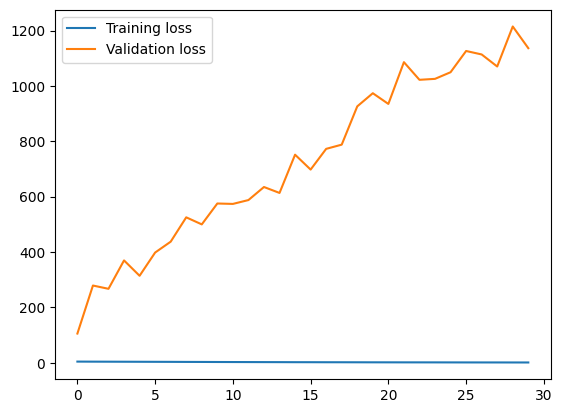

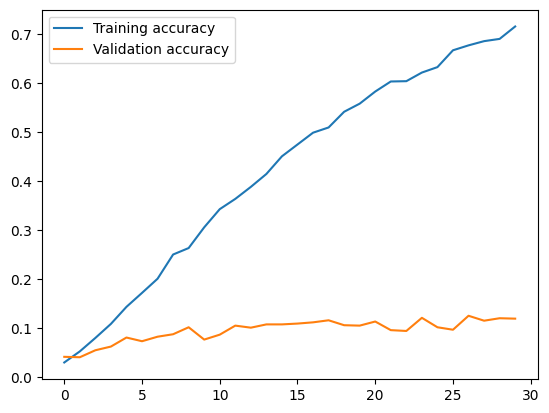

In [14]:
# Graph the training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Graph the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [12]:
from tensorflow import keras
import numpy as np
img = tf.keras.preprocessing.image.load_img(
    'test_images/z1910141107270.jpg', target_size=(224, 224)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("predictions: ", predictions)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(dataset.class_names[np.argmax(score)], np.max(score))
)


1/1 [==============================] - 0s 15ms/step
predictions:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]
This image most likely belongs to selles-sur-cher with a 0.04 percent confidence.
